In [8]:
import pickle
import jax.numpy as np

In [ ]:
with open('output_weights_tol.pkl', 'rb') as f:
    data = pickle.load(f)


In [10]:
sidelobes = np.load('sidelobes_tol.npy')
bin_centers = np.load('bin_centers_tol.npy')
input_weights = np.load('input_weights_tol.npy')

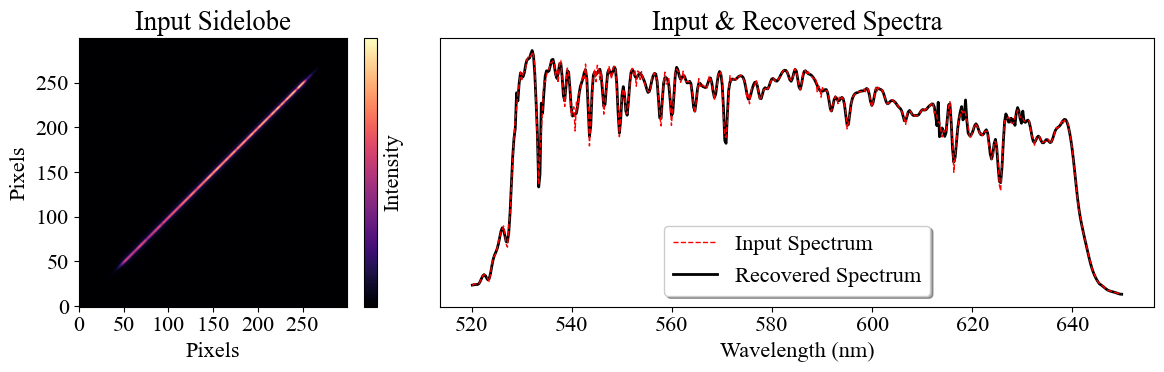

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Times New Roman font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

cmap = plt.get_cmap('magma')
norm = colors.Normalize(vmin=0, vmax=99)  # Normalize iteration range

# Create figure and gridspec
fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 3, figure=fig)

# First subplot (column 1)
ax1 = fig.add_subplot(gs[0, 0])
im = ax1.imshow(sidelobes, origin='lower', cmap=cmap)
ax1.set_title('Input Sidelobe')
ax1.set_xlabel('Pixels')
ax1.set_ylabel('Pixels')

tick_spacing = 50
image_shape = sidelobes.shape
ax1.set_xticks(np.arange(0, image_shape[1], tick_spacing))
ax1.set_yticks(np.arange(0, image_shape[0], tick_spacing))

cbar1 = fig.colorbar(im, ax=ax1)
cbar1.set_ticks([])  # remove tick marks and labels
cbar1.ax.set_ylabel('Intensity')

# Second subplot spans columns 2 and 3
ax2 = fig.add_subplot(gs[0, 1:3])

# for i in range(100):
#     output_weights = models_out[i].telescope.source.spectrum.weights / np.sum(models_out[i].telescope.source.spectrum.weights)
#     color = cmap(1 - i / 99)
#     ax2.plot(bin_centers * 1e9, output_weights, color=color, linewidth=1)

ax2.tick_params(axis='y', left=False, labelleft=False)
ax2.set_xlabel("Wavelength (nm)")
ax2.set_title("Input & Recovered Spectra")

ax2.plot(bin_centers * 1e9, data[99]/np.sum(data[99]), color='black', linewidth=2)
# Overlay true spectrum
ax2.plot(bin_centers * 1e9, input_weights, color='red', linestyle='--', linewidth=1, label='Input Spectrum')
# Create a fake gradient entry using a Patch with the colormap
gradient_patch =  Line2D([0], [0], color='black', linestyle='-', label='Recovered Spectrum', linewidth=2)

# Existing legend items
input_line = Line2D([0], [0], color='red', linestyle='--', label='Input Spectrum', linewidth=1)

# Combine and add to legend
ax2.legend(handles=[input_line, gradient_patch], loc='lower center', shadow=True)
#ax2.legend(shadow=True,loc='lower center')
# Colorbar for iterations
# sm = cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar2 = fig.colorbar(sm, ax=ax2, label="Iteration")
# cbar2.ax.invert_yaxis()
# cbar2.set_ticks([])

plt.tight_layout()
#plt.savefig('input_recovered_magma_blue.pdf', dpi=300, bbox_inches='tight')
plt.show()
